# 第三章 11条数据化运营不得不知的数据预处理经验

数据预处理是数据化运营过程中重要的环节，直接影响着后期所有的数据工作质量和价值输出。从数据预处理的主要内容来看，包括**数据清洗、转换、归约、聚合、抽样等**。

## 3.1 数据清洗：缺失值、异常值和重复值的处理

* **清洗：**是对数据集进行丢弃、填充、替换、去重等操作，实现去除异常、纠正错误、补足缺失的目的。

### 3.1.1 数据列缺失的4中处理方法

数据缺失分为两种：

1. 行记录的缺失（数据记录丢失）
2. 列值缺失

> 某些少数情况下，会使用空字符串来代替缺失值，但是空字符串绝对不同于缺失值，从对象实体来看，空字符串是有实体的，实体为字符串类型，而缺失值其实是没有实体的，即没有数据类型。

丢失的行记录通常是无法找回的，而对于列值来说，通常有四种方法或者思路来找回：

**1. 丢弃**

即直接删除带有缺失值的记录（整行删除）或者列字段（整列删除），以减少缺失记录对总体数据的影响。但是丢弃也意味着消减数据特征，在以下的场景中，不易使用：

* 数据集总体中存在大量的数据记录不完整情况且比例较大，例如超过数据集总体的10%，删除这些带有缺失值的记录意味着损失过多的有用信息；
* 带有缺失值的数据记录大量存在着明显的数据分布规律或特征，例如带有缺失值数据记录的目标标签主要集中在某一类或几类，如果删除这些数据记录将是对应的数据样本丢失大量的特征信息，导致模型过拟合或者分类不准确。

**2. 补全**

即通过一定的方式方法将缺失的数据补上，从而形成完整的数据记录，对于后续的数据处理、分析和建模至关重要。常用的补全方法有：

* **统计法：** 对于数值型的数据，使用均值、加权均值、中位数等方法补齐；对于分类型数据，使用类别众数最多的值补齐；
* **模型法：** 基于已有的其他数据，将缺失值作为目标变量进行预测，从而得到最有可能的补全值。如果带有缺失值的列是数值变量，则使用回归模型补齐，如果是分类变量，则使用分类模型补齐；
* **专家法：** 对于少数具有重要意义的数据记录，通过领域专家来对数据进行分析，从而进行缺失值补齐；
* **其他方法：** 随机法、特殊值法、多重填补法等。

**3. 真值转换法**

核心思路是承认缺失值的存在，并且把数据缺失也作为数据分布规律的一部分，但是缺失值往往无法在后续的数据处理和模型中进行计算，此时需要将缺失值进行真值转换。例如用户的性别，很多数据库中无法对会员的性别进行补齐，但是此性别数据有非常的重要，因此将男、女、未知从一个变量的多个值分布状态转换到多个变量的真值分布状态：

转换前：性别（男、女、未知）
转换后：性别_男（值域1或0）、性别_女（值域1或0）、性别_未知（值域1或0）

然后将这3列新的字段作为输入维度以替换原来的1个字段，参与后续的数据分析、建模计算等。

**4. 不处理**

即在数据预处理阶段，不对带有缺失值的数据记录进行任何处理。此种方式主要要看后续的数据分析和建模应用，对于缺失值的容忍度或灵活处理方式。常见的能够自动补齐缺失值的模型有：**KNN、决策树、随机森林、神经网络、朴素贝叶斯和DBSCAN（基于密度的带有噪声的空间聚类模型）等**，这些模型对于缺失值的处理思路是：

* 忽略：即缺失值不参与计算（KNN）
* 将缺失值作为分布的一种状态，并参与到建模过程（决策树以及变体）
* 不基于距离做计算，因此基于值的距离做计算，本身的影响将消除（DBSCAN）

### 3.1.2 不要轻易抛弃异常数据

异常数据是数据分布的常态，处于特定分布区域或范围之外的数据通常被定义为异常或“噪声”。从数据异常的状态来看，所谓的数据异常分为两种：

* **伪异常：** 由于业务的特定运营动作产生，是正常反应业务状态的数据，而不是数据本身的异常规律；
* **真异常：** 并非特定的运营动作产生，而是客观反映数据本身分布异常的个案。

在实际进行数据处理的过程中，“异常数据”往往被当做噪声直接剔除，但是在一下几种情况下，无需对异常值做抛弃处理：

**1. 异常值正常反应了业务运营的结果**：是特定业务动作导致的数据分布异常，如果抛弃将导致无法正确反应业务的结果；
**2. 异常检测模型**：异常数据本身是目标数据，如果被处理掉，将损失关键性的信息；
**3. 包容异常值的数据建模**：数据算法或建模方法对异常值不敏感，异常值对模型本身不会造成负面影响（决策树中，异常值本身可以作为一种分裂节点）。

> 除了抛弃和保留，还有一种思路是对异常值使用其他的统计量、预测量进行替换，但是此类方法会将数据集中本身的关键分布特征消除，从而改变原始数据集的分布规律。

### 3.1.3 数据重复就需要去重吗

数据集中数据重复包含两种情况：

1. 数据值完全相同的多条数据记录；
2. 数据主体相同但匹配到的唯一属性值不同

去重的主要目标是保留显示特征的唯一特征记录，但是当遇到以下几种情况的时候，不建议或者慎重执行数据去重：

**1. 重复的记录用于分析演变规律**：例如商品类别的归属变化，不同时间段，可能同一个商品的归属有所变化，这样在数据库中可能就有一个 **变化维度表**。表格的维度在不断的发生变化，而对于维度的变化，有3中不同的处理方式：
    * 直接覆盖原有值（无法保留历史信息）
    * 添加新的维度行（统一ID的商品会有两条匹配记录）
    * 增加新的属性列（不会改变数据行记录）

> **变化维度表：** 是数据仓库中的概念。维度表类似匹配表，用来存储静态的维度、属性等数据，而这些数据一般都不会发生改变。但是变与不变是一个相对的概念，随着企业的不断发展，很多的维度也会发生变化，因此在某个时间内的维度是不改变的，而整体来看维度是变化的。

**2. 重复的记录用于样本不均衡处理**

样本的不均衡是影响分类模型效果的关键因素之一，解决的方法一般是对少数样本进行简单过采样，通过随机过采样采取简单复制样本的策略来增加少数类样本，而这样的处理会在数据记录中产生相同记录的多条数据，此时不能对其中的重复值执行去重操作。

**3. 重复的记录用于检测业务规则问题**

主要针对的是事务性的数据，重复数据可能意味着重大运营规则问题。此类重复的数据记录可能是由于数据采集、存储、验证和审核机制的不完善问题导致的，会直接影响到前台生产和运营系统。例如重复的订单、重复的充值、重复的预约等等。

### 3.1.4 Python数据清洗

**1. 缺失值处理**

主要配合使用 `sklean.prepricessing` 中的 `Imputer` 类、Pandas和Numpy。

In [1]:
# 导入Pandas库
import pandas as pd
# 导入Numpy库
import numpy as np
# 导入sklearn.preprocessing中的Imputer库
from sklearn.preprocessing import Imputer

In [2]:
# 为了演示，我们手动生成一些带有却是数据的数据
# 使用pandas中数据结构DataFrame生成一个 6 x 4 的数据集，列名分别为 'col1', 'col2', 'col3', 'col4'。
df = pd.DataFrame(np.random.randn(6, 4), columns = ['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,-1.372748,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,-1.352342
5,-0.533625,-0.319339,0.081843,-1.148576


In [3]:
# 增加缺失值
df.iloc[1:2, 1] = np.nan
df

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,NaN,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,-1.352342
5,-0.533625,-0.319339,0.081843,-1.148576


In [4]:
# 增加缺失值
df.iloc[4, 3] = np.nan
df

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,NaN,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,NaN
5,-0.533625,-0.319339,0.081843,-1.148576


In [5]:
# 查看哪些值缺失
nan_all = df.isnull()
nan_all

,col1,col2,col3,col4
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,True
5,False,False,False,False


In [6]:
# 查看含有NA的列
nan_col1 = df.isnull().any()
nan_col1

col1    False
col2     True
col3    False
col4     True
dtype: bool

In [7]:
# 查看全部为NA的列
nan_col2 = df.isnull().all()
nan_col2

col1    False
col2    False
col3    False
col4    False
dtype: bool

In [8]:
# 丢弃缺失值（直接丢弃含有NA的行记录）
df2 = df.dropna()
df2

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
5,-0.533625,-0.319339,0.081843,-1.148576


**使用sklearn将缺失值替换为特定值**

In [9]:
# 建立替换规则：将值为NA的缺失值使用均值替换
nan_model = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
nan_model

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [10]:
# 应用替换规则
nan_result = nan_model.fit_transform(df)
nan_result

array([[ 1.02400212, -0.16100678, -0.43184037,  0.9128756 ],
       [-1.16125029, -0.31207807,  0.22565657, -0.77738261],
       [-2.01545525,  0.13917868,  0.17112329, -0.14808491],
       [ 0.71813715, -1.32744327, -0.58181348,  2.6364025 ],
       [ 0.87355356,  0.10821993, -0.05731169,  0.29504698],
       [-0.53362486, -0.31933892,  0.08184256, -1.14857566]])

**使用Pandas将缺失值替换为特定值**

In [11]:
# 使用缺失值后面值替换缺失值
nan_result_pd1 = df.fillna(method = 'backfill')
nan_result_pd1

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,0.139179,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,-1.148576
5,-0.533625,-0.319339,0.081843,-1.148576


In [12]:
# 使用后面的值替换缺失值，限制每列智能替换一个值
nan_result_pd2 = df.fillna(method = 'backfill', limit = 1)
nan_result_pd2

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,0.139179,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,-1.148576
5,-0.533625,-0.319339,0.081843,-1.148576


In [13]:
# 使用前面的值替换缺失值
nan_result_pd3 = df.fillna(method = 'pad')
nan_result_pd3

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,-0.161007,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,2.636402
5,-0.533625,-0.319339,0.081843,-1.148576


In [14]:
# 使用0替换缺失值
nan_result_pd4 = df.fillna(0)
nan_result_pd4

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,0.000000,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,0.000000
5,-0.533625,-0.319339,0.081843,-1.148576


In [15]:
# 使用不同的值替换不同列的缺失值
nan_result_pd5 = df.fillna({'col2': 1.1, 'col4': 1.2})
nan_result_pd5

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,1.100000,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,1.200000
5,-0.533625,-0.319339,0.081843,-1.148576


In [16]:
# 使用平均数替换缺失值（使用各自列的均值）
nan_result_pd6 = df.fillna(df.mean()['col2':'col4'])
nan_result_pd6

,col1,col2,col3,col4
0,1.024002,-0.161007,-0.431840,0.912876
1,-1.161250,-0.312078,0.225657,-0.777383
2,-2.015455,0.139179,0.171123,-0.148085
3,0.718137,-1.327443,-0.581813,2.636402
4,0.873554,0.108220,-0.057312,0.295047
5,-0.533625,-0.319339,0.081843,-1.148576


**2. 异常值处理**

异常值是指某些数据项数据超出了或者低于某个阈值，是的数据的域与总体不同的值。通常情况下处理异常值会使用一些既定的方法方式。例如**Z-标准化**方式，即使用该方式获得一个阈值，使用得到的阈值作为判断标准：当标准化后的得分超过阈值则视为异常。

In [17]:
## 生成带有异常数据的数据框
import pandas as pd

In [18]:
df = pd.DataFrame({'col1': [1, 120, 3, 5, 2, 12, 13], 'col2': [12, 17, 31, 53, 22, 32, 43]})
df

,col1,col2
0,1,12
1,120,17
2,3,31
3,5,53
4,2,22
5,12,32
6,13,43


In [19]:
df.shape

(7, 2)

**通过 Z-Score 方法判断异常值**

In [20]:
# 复制一个用来存储z-score得分的数据框
df_zscore = df.copy()
df_zscore.shape

(7, 2)

In [21]:
# 获取数据框的列名
cols = df.columns
cols

Index(['col1', 'col2'], dtype='object')

In [22]:
# 循环读取每列的
for col in cols:
    # 得到每列的值
    df_col = df[col]
    # 计算每列的Z-score标准化得分
    z_score = (df_col - df_col.mean()) / df_col.std()
    # 判断Z-score得分是否大于2.2，如果大于，则为True
    df_zscore[col] = z_score.abs() > 2.2

df_zscore

,col1,col2
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


**如何判断异常值？**

对于固有业务规则的可以直接套用业务规则，面对没有固定业务规则的，可以采用常见的数学模型来进行判断，例如基于概率分布的方法、基于聚类的模型、基于密度的方法、基于分类的方法、基于统计的额方法等，要根据实际情况来选择。

**3. 重复值处理**


重复值也就是在同一个数据集中，有相同的数据，对于重复值的处理较为简单暴力。要么直接删除，要么选择其一。

In [23]:
import pandas as pd

# 生成重复数据
data1 = ['a', 3]
data2 = ['b', 2]
data3 = ['a', 3]
data4 = ['d', 2]

df = pd.DataFrame([data1, data2, data3, data4], columns = ['col1', 'col2'])
df

,col1,col2
0,a,3
1,b,2
2,a,3
3,d,2


In [24]:
# 判断重复值
isDuplicated = df.duplicated()
isDuplicated

0    False
1    False
2     True
3    False
dtype: bool

In [25]:
# 删除重复数据

# 1. 删除数据记录中所有列值相同的记录
new_df1 = df.drop_duplicates()
new_df1

,col1,col2
0,a,3
1,b,2
3,d,2


In [26]:
# 2. 删除数据记录中col1值相同的记录
new_df2 = df.drop_duplicates(['col1'])
new_df2

,col1,col2
0,a,3
1,b,2
3,d,2


In [27]:
# 3. 删除数据记录中col2值相同的记录
new_df3 = df.drop_duplicates(['col2'])
new_df3

,col1,col2
0,a,3
1,b,2


In [28]:
# 4. 删除数据记录中指定列值相同的记录
new_df4 = df.drop_duplicates(['col1', 'col2'])
new_df4

,col1,col2
0,a,3
1,b,2
3,d,2


## 3.2 将分类数据和顺序数据转为标志变量

### 3.2.1 分类数据和顺序数据是什么

非数值型变量通常在数据建模过程中无法处理，例如KMeans算法用于计算距离的相似度，而字符串则无法直接计算距离。此类无法直接使用的数据可以分为两大类：

1. 分类数据：指只能归于某一类别的非数值型数据。

    * 性别 --- 男、女
    * 颜色 --- 红、黄、蓝
    
  分类数据中的值没有明显的高低、大小等包含等级、顺序、排序、好坏等逻辑划分，只能用来区分两个或多个具有相同或者相当价值的属性。是在相同衡量维度上的不同属性而已。
  
2. 顺序数据：指只能归于某一有序类别的非数值型数据。

    * 用户价值等级 --- 高、中、底
    * 学历 --- 学士、研究生、博士
    
  顺序数据中的值具有明显的排序规律和逻辑层次的划分。


### 3.2.2 运用标志方法处理分类和顺序数据

分类数据和顺序数据要参与建模，通常会转化为数值型数据。最佳的方法是：

**将所有分类或者顺序变量的值域从一列多值的形态转换为多列只包含真值的形态，其中真值可以使用True、False或者1、0来表示。** 此类转换也被称为 **真值转换**

用户ID | 性别  | 用户性别-男 | 用户性别-女
---- | ---  | --- | --- |
35666841 | 男 | 1 | 0
65456567 |  女 | 0 | 1
65498932 |  女  | 0 | 1

例如上表格中，第一列和第二列是原始的数据格式，性别由‘男’和‘女’来表示，第三列和第四列是经过转换后的表示。

### 3.2.3 代码实操：Python标志转换

这里讲模拟两列数据分别出现分类数据和顺序数据的情况，并通过自定义代码以及sklearn代码分别进行标志转换。

In [29]:
# 导入pandas库
import pandas as pd
# 导入OneHotEncoder库
from sklearn.preprocessing import OneHotEncoder

In [30]:
# 生成数据
df = pd.DataFrame({'id': [112, 123, 134],
                  'sex': ['male', 'Female', 'Female'],
                  'level': ['high', 'low', 'middle']})
# 打印输出原始数据框
df

,id,sex,level
0,112,male,high
1,123,Female,low
2,134,Female,middle


In [31]:
# 自定义转换

# 复制一份新的数据框用来存储转换结果
df_new = df.copy()
# 循环读出每列的索引和列名
for index, col_name in enumerate(df):
    # 获取每列的数据
    col_data = df[col_name]
    # 获取每列的dtype类型
    col_type = col_data.dtype
    
    #  如果dtype类型为object（非数值型），执行条件
    if col_type == 'object':
        # 首先删除数据框中要进行标志转换的列
        df_new = df_new.drop(col_name, 1)
        # 获取分类和顺序变量的唯一值域
        value_sets = col_data.unique()
        # 读取分类和顺序变量中的每个值
        for value_unique in value_sets:
            # 创建新的列名，一般使用‘原标题+值’的方式命名
            col_name_new = col_name + '_' + value_unique
            # 获取原始数据列
            col_tmp = df.iloc[:, index]
            # 将原始数据列与每个值进行比较，相同则为True，否则为False
            new_col = (col_tmp == value_unique)
            # 为最终结果集增加新列
            df_new[col_name_new] = new_col

# 打印转换后的结果数据框
df_new

,id,sex_male,sex_Female,level_high,level_low,level_middle
0,112,True,False,True,False,False
1,123,False,True,False,True,False
2,134,False,True,False,False,True


In [32]:
# 使用sklearn进行标志转换

df = pd.DataFrame({'id': [112, 123, 134],
                  'sex': [1, 2, 2],
                  'level': [3, 1, 2]})
df

,id,sex,level
0,112,1,3
1,123,2,1
2,134,2,2


In [33]:
# 获取ID列
id_data = df.values[:, :1]
# 指定要转换的列
transfrom_data = df.values[:, 1:]
# 建立转换模型
enc = OneHotEncoder()
# 进行标志转换
df_new = enc.fit_transform(transfrom_data).toarray()
# 组合为新数据
df_all = pd.concat((pd.DataFrame(id_data), pd.DataFrame(df_new)), axis = 1)
df_all

,0,0,1,2,3,4
0,112,1.0,0.0,0.0,0.0,1.0
1,123,0.0,1.0,1.0,0.0,0.0
2,134,0.0,1.0,0.0,1.0,0.0


通过简单的演示可以看到，两种方式的最终都将分类数据或顺序数据进行了标志的转换，使得数据能够更好在接下来的数据深加工和建模中进行友好的计算等。在上述过程中需要关注的是：

* 如何判断要转换的额数据是分类或者顺序数据
* 要在结果数据框中不断删除被转换的原始列并新增转换后的数据列，以防止数据列的重复。

## 3.3 大数据时代的数据降维

**数据降维**是降低数据的维度数量，是维度归约的一种重要课题。

### 3.3.1 需要数据降维的情况

数据降维的主要目的是降低模型的计算量并减少模型运行事件、减低噪声变量信息对于模型结果的影响，便于通过可视化的方式展示归约后的维度信息并减少数据存储空间。是否需要进行降维主要需要考虑如下几个方面：

1. 维度数量： 降维的基本前提是高维，如果只要几个维度，就不需要降维了，另外还需要衡量维度的重要性、共线性以及其他排除关系，而不是出于高维的考虑。
2. 建模输出是否必须保留原始维度： 当需要保留原始维度时，不能进行转寒方式降维，只能选择特征筛选的方式降维。
3. 对模型的计算效率与建模时效性有要求： 高维数据建模时，模型的消耗将呈现几何倍数增长，造成运算效率低、耗时长。
4. 是否要保留完整数据特征： 当需要所有数据集的完整特征时，不需要进行降维。

### 3.3.2  基于特征选择的降维

基于特征选择的降维指的是根据一定规则和经验，直接选取原有维度的一部分参与到后续的计算和建模过程，用选择的维度代替所有维度，整个过程不产生新的维度。

方法：

* **经验法**： 领域专家的经验、对业务的理解等
* **测算法**： 不断测试多种维度的结果，最终选择最佳特征
* **基于统计分析的方法**： 对维度之间进行相关性分析，进行人工去除或者筛选
* **机器学习算法**： 通过机器学习算法得到不同特征的特征值和权重，根据权重选择特征。（CART决策树等）

### 3.3.3  基于维度转换的降维

按照一定的数据变换方法，把给定的一组相关变量（维度）通过数学模型将高维空间的数据点映射到低维空间，然后利用映射变量的特征来表示原有变量的总体特质。此种方法会产生一种新的维度，而转换后的维度并不是原始维度的本体，是综合多个维度转换或者映射后的表达式。

基于维度转换的降维方式，通常会使用主成分分析（PCA）来进行。而PCA主要的使用场景有：

1. **非监督式的数据集**： PCA是一种非监督式的降维方法，因此适用于不带有标签的数据集，对于带有标签的数据集则可以使用 **LDA**；
2. **根据方差自主控制特征数量**： 最大的主成分分析的数量会小于或者等于特征的数量，也就是说PCA也可以输出完全相同数据的特征，主要取决于选择特征中解释的方差比例；
3. **更少的正则化处理**： 选择较多的主成分分析将导致较少的平滑性，因为需要保留更多的数据特征，需要减少正则化；
4. **数据量较大的数据集**： 包括数据记录多和数据维度多两种情况；
4. **数据分布是位于相同平面（非曲面），数据中存在线性结构。**

### 3.3.4  代码实操： Python数据降维

本例中将使用DecisionTreeClassifier来判断变量重要性并选择变量，通过PCA进行维度转换。

In [34]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [35]:
# 读取数据文件（本次使用的数据是带有标签的数据，最后一列为标签）
data = np.loadtxt('data1.txt')
# 获取输入的x
X = data[:, :-1]
# 获取目标变量
y = data[:, -1]

X[0],y[0]

(array([ 1.88622997,  1.31785876, -0.16480621,  0.56536882, -1.11934542,
        -0.53218995, -0.6843102 ,  1.24149827,  1.00579225,  0.45485041]), 0.0)

In [36]:
# 使用DecisionTreeClassifier判断变量重要性

# 建立分类决策树模型对象
model_tree = DecisionTreeClassifier(random_state=0)
# 将数据集的维度和目标变量输入模型
model_tree.fit(X, y)
# 获取所有变量额重要性得分
feature_importance = model_tree.feature_importances_

print(feature_importance)

[0.03331054 0.01513967 0.02199713 0.119727   0.47930312 0.04776297
 0.17111746 0.02585441 0.02012725 0.06566044]


In [37]:
# 使用PCA进行维度转换

# 建立PCA模型对象
model_pca = PCA()
# 将数据集输入模型
model_pca.fit(X)
# 对数据集进行转换映射
model_pca.transform(X)
# 获取转换后的所有主成分
components = model_pca.components_
# 获取主成分的分差
components_var = model_pca.explained_variance_
# 获取主成分的方差占比
components_var_ratio = model_pca.explained_variance_ratio_

In [38]:
print(components[: 2])
print('\n')
print(components_var[: 2])
print('\n')
print(components_var_ratio)
print('\n')

for i in range(2, len(components)-2):
    print(components_var_ratio[:i].sum())

[[ 7.18818316e-03  1.41619205e-02  1.00543847e-02  3.65097575e-01
   6.38944537e-01 -1.95750380e-02 -1.73413378e-01 -3.80829974e-02
  -2.87413113e-03 -6.52829504e-01]
 [ 1.01307710e-02 -1.95270201e-04 -2.33689543e-02 -6.12915216e-01
   5.08983971e-01 -2.23429533e-02  6.02958940e-01 -1.49061329e-02
  -1.81362216e-02 -3.41623971e-03]]


[4.22602937 2.21149972]


[3.38339364e-01 1.77054475e-01 8.92753857e-02 8.73655166e-02
 8.23542686e-02 8.03329836e-02 7.38094896e-02 7.14685179e-02
 5.71399845e-33 2.14712842e-33]


0.5153938380778149
0.6046692238197511
0.6920347403945387
0.7743890089501768
0.854721992543167
0.9285314821212255


> 一般情况下，如果选择的变量重要性总得分接近80%，基本上已经可以解释大部分的特征变化了。

所有主成分的方差占比是选择主成分数量的关键，因为PCA降维的基本思想是根据方差占比来选择主成分的数量。

> 在建立PCA模型时，可通过`n_components`指定要获得的主成分数量，但是不建议这么做，因为是无法确定各主成分的方差占比判断到底指定多少个主成分最合适，但是如果有强烈的约束，可通过`n_components`指定要获得的主成分数量。

## 3.4 解决样本类别分布不均衡的问题

样本不均衡是指不同类别的样本量差异非常大。主要出现在分类问题上，从数据规模上可以分为大数据分布不均衡和小数据分布不均衡。

### 3.4.1 哪些运营场景中容易出现样本不均衡

1. **异常检测场景**
2. **客户流失场景**
3. **罕见事件的分析**
4. **发生频率低的事件**

### 3.4.2 通过过抽样和欠抽样解决样本不均衡

重新抽样是解决样本不均衡相对简单的方法。

* 过采样：又称上采样（over-sampling），增加分类中少数类样本的数量来实现均衡，直接的方法是复制，高端点的方法通过少数类中加入随机造成、干扰数据或通过一定的规则产生新的合成样本，例如SMOTE算法；
* 欠采样：又称下采样（under-sampling），减少分类中多数类样本的数量来实现均衡，直接的方法是随机去除。

### 3.4.3 通过正负样本的惩罚权重解决样本不均衡

在算法实现的过程中，对于分类中不同样本数量的类别进行分别赋予不同的权重（一般思路分类中的小样本的类别权重较高），然后进行计算和建模。

现在绝大部分的算法模型库中都带有类似的权重设置参数，你可以轻松的进行权重的设置等。例如scikit-learn中的SVM，通过在`class_weight：{dict, 'balanced'}`中针对不同类别设置权重来进行均衡处理。SVM中进行自动均衡的计算公式为：

`n_samples  / (n_classes * np.bincount(y))`

### 3.4.4 通过组合/集成方法解决样本不均衡

在每次生成训练集时使用所有分类中的小样本量，同时从分类中的大样本量中随机抽取数据来与小样本量合并构成训练集，反复之后会得到很多训练集和训练模型，最后使用组合产生分类预测结果。

### 3.4.5 通过特征选择解决样本不均衡

### 3.4.6 代码实操：Python处理样本不均衡

本次会使用专门用于吹不均衡数据的Python包imbalanced-learn，在开始前你可能需要安装此库：

```sh
pip install imbalanced-learn
```

In [39]:
import pandas as pd
# 导入过采样处理库SMOTE
from imblearn.over_sampling import SMOTE
# 导入欠采样处理库RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
# SVM中的分类算法SVC
from sklearn.svm import SVC
# 简单集成方法EasyEnsemble
from imblearn.ensemble import EasyEnsemble

In [40]:
# 导入数据文件
df = pd.read_table('data2.txt', sep=' ', names=['col1', 'col2', 'col3', 'col4', 'col5', 'label'])
df.head()

,col1,col2,col3,col4,col5,label
0,1.484710,-0.567953,0.957248,-1.028711,-1.143092,0.0
1,-1.021847,-0.209943,0.585039,-0.625991,-0.532367,0.0
2,-0.418176,0.878976,-0.333351,0.371767,1.223683,0.0
3,0.441664,1.405135,2.334376,-2.453234,0.594130,0.0
4,-1.855857,1.342565,1.457096,-1.522041,0.935034,0.0


In [41]:
# 切片， 获取输入X、标签y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# 对标签进行分类汇总，即统计各类下有多少数据项
groupby_data_origian = df.groupby('label').count()
groupby_data_origian

,col1,col2,col3,col4,col5
label,,,,,
0.0,942,942,942,942,942
1.0,58,58,58,58,58


从统计结果来看，明显标签为1的数据较少，此数据集属于不平衡数据集，需要进行平衡处理。

In [42]:
# 使用SMOTE进行过采样处理
model_smote = SMOTE()
# 输入数据并做抽样处理
X_smote_resampled, y_smote_resampled = model_smote.fit_sample(X, y)
# 将数据转换为数据框并命名列明
X_smote_resampled = pd.DataFrame(X_smote_resampled, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
y_smote_resampled = pd.DataFrame(y_smote_resampled, columns=['label'])
# 按列合并数据
smote_resampled = pd.concat([X_smote_resampled, y_smote_resampled], axis = 1)
## 对标签进行分类汇总，即统计各类下有多少数据项
groupby_data_smote = smote_resampled.groupby('label').count()
groupby_data_smote

,col1,col2,col3,col4,col5
label,,,,,
0.0,942,942,942,942,942
1.0,942,942,942,942,942


使用SMOTE方法对原始不平衡数据进行过采样，使得少数类的数据已经和多数类的数据量平衡。接下来试一下将多数类减少，来平衡数据集。

In [43]:
# 使用RandomUnderSampler进行欠采样抽样
model_RandomUnderSampler = RandomUnderSampler()
# 输入数据并做抽样处理
X_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled = model_RandomUnderSampler.fit_sample(X, y)
# 将数据转换为数据框并命名列明
X_RandomUnderSampler_resampled = pd.DataFrame(X_RandomUnderSampler_resampled, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
y_RandomUnderSampler_resampled = pd.DataFrame(y_RandomUnderSampler_resampled, columns=['label'])
# 按列合并数据
randomUnderSampler_resampled = pd.concat([X_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled], axis = 1)
## 对标签进行分类汇总，即统计各类下有多少数据项
groupby_data_RandomUnderSampler = randomUnderSampler_resampled.groupby('label').count()
groupby_data_RandomUnderSampler

,col1,col2,col3,col4,col5
label,,,,,
0.0,58,58,58,58,58
1.0,58,58,58,58,58


使用RandomUnderSampler进行随机欠采样抽样方法对原始不平衡数据进行过采样，减少多数类的数据量，使得达到平衡。

In [44]:
# 使用SVM的权重调节处理不平衡样本
model_svm = SVC(class_weight='balanced')
model_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# 使用简易集成方法处理不平衡样本
model_EasyEnsemble = EasyEnsemble()
# 输入数据并做抽样处理
X_EasyEnsemble_resampled, y_EasyEnsemble_resampled = model_EasyEnsemble.fit_sample(X, y)

print(X_EasyEnsemble_resampled.shape)
print(y_EasyEnsemble_resampled.shape)

(10, 116, 5)
(10, 116)


In [46]:
# 简易集成方法处理完成后，抽样一部分数据进行审查
# 设置抽样样本集索引
index_num = 1
X_EasyEnsemble_resampled_t = pd.DataFrame(X_EasyEnsemble_resampled[index_num], columns=['col1', 'col2', 'col3', 'col4', 'col5'])
y_EasyEnsemble_resampled_t = pd.DataFrame(y_EasyEnsemble_resampled[index_num], columns=['label'])
EasyEnsemble_resampled = pd.concat([X_EasyEnsemble_resampled_t, y_EasyEnsemble_resampled_t], axis=1)
groupby_data_EasyEnsemble = EasyEnsemble_resampled.groupby('label').count()
groupby_data_EasyEnsemble

,col1,col2,col3,col4,col5
label,,,,,
0.0,58,58,58,58,58
1.0,58,58,58,58,58


上述的数据平衡过程中，需要考虑的关键点是：

* 如何针对不同的具体场景选择最合适的样本均衡解决方案
* 选择过程中既要考虑到每个类别样本的分布情况及总体样本情况，还要考虑后续数据建模算法的适应性及整个数据模型计算的准确性和时效性。

## 3.5 如何解决运营数据源的冲突问题

1. 数据类型冲突
2. 数据结构冲突
3. 记录粒度不同
4. 数据值域的定义不同
5. 数据值不同

### 3.5.1 为什么会出现多数据源的冲突

1. 内部工具与第三方工具数据冲突：
    1. 对比指标不同（广告媒体代理商与网站统计分析）
    2. 测量的时机不同
    3. 网络丢包的问题
    4. 去重机制的问题
    5. 用户中途退出问题
    6. 页面跟踪加载问题
    7. 动机导致的数据夸大
    8. 其他因素
2. 内部同一个业务主体的同一类数据工具的数据测量冲突
    1. 指标定义不同
    2. 采集逻辑不同
    3. 系统过滤规则不同
    4. 更新时间不同
    5. 监测位置不同
3. 内部同一个业务主体的不同数据工具的数据测量冲突
    1. 订单来源差异
    2. 特殊商品订单跟踪
    3. 订单状态差异
    4. 数据同步问题
    5. 内部系统拆单问题
    
### 3.5.2 如何应对多数据源的冲突问题

1. 消除冲突并形成一份唯一数据：全量数据的汇总统计工作等；
2. 不消除冲突也不作任何处理：使用细粒度的数据进行数据建模等；
3. 不消除冲突但是使用全部冲突数据： 进行流程性统计分析等。
   
> 不消除冲突的情况下，也需要谨慎的对待这种情况，一般情况下，需要关注两方面内容：
> 1. 差异性： 对于相同实体在相同逻辑下的数据冲突（差异）应该在5%以内，条件允许时可放宽到10%，超过则需要严格对待冲突问题；
> 2. 稳定性： 当冲突无法消除时，需要确保多数据源数据的差异性相对稳定，不能出现差异变更甚至相反分布的情况。

## 3.6 数据化运营要抽样还是全量数据

抽样是从整体样本中通过一定的方法选择一部分样本，抽样是雏菊处理的基本步骤之一，也是科学实验、质量检测、社会调查等普遍使用的一种经济有效的工作方法。

### 3.6.1 什么时候需要抽样

1. 数据计算资源不足
2. 数据采集限制
3. 时效性要求

应该使用抽样的方法来解决具体问题的场景：
 
* 通过抽样实现快速的概念验证
* 通过抽样来解决样本不平衡问题
* 无法实现对全部样本覆盖的数据化运营场景
* 定性分析的工作需要

### 3.6.2 如何进行抽样

抽样从整体上分为 **非概率抽样** 和 **概率抽样** 两种。非概率抽样不是按照等概率的原则进行抽样，而是根据人类的主观经验和状态进行判断；概率抽样则是以数学概率论为基础，按照随机的原则进行抽样，一般概率抽样分为如下几种：

1. 简单随机抽样：适用于个体分布均匀的场景
2. 等距抽样：适用于个体分布均匀或呈现明显的均匀分布规律，无明显趋势或周期性规律的数据
3. 分层抽样：适用于带有分类逻辑的属性、标签等特征的数据
4. 整群抽样：适用于小群体集的特征差异较小，并且对划分小群体集有更高的要求

### 3.6.3 抽样需要注意的几个问题

**1. 数据抽样要能反映运营背景**

数据能正确反映运营背景，但实际上此过程需要数据工作者对于运营环节和流程非常熟悉才可。

以下是常见的抽样不能反映运营背景的情况：

* 数据时效性问题：使用合适时间段的数据，而非历史久远的数据
* 缺少关键因素数据：没有运营活动的关键性数据
* 不具备业务随机性：抽样后的数据只能反映某一种特定的数据场景
* 没有考虑业务增长性：企业在成长，数据也应该有所变化
* 没有考虑数据来源的多样性：不能只选择某一个来源的数据
* 业务数据可行性问题：根据运营实际情况调整数据工作

**2. 数据抽样要能满足数据分析和建模要求**

数据抽样要注意一下几个方面：

1. 抽样样本量的问题
    * 以时间为维度分布的，至少要包含一个能满足预测的完整业务周期；
    * 做预测（包含分类和回归）分析建模的，需要考虑特征数量和特征值域的分布，通常数据记录数要同时是特征数量和特征值域的100倍以上；
    * 做关联规则分析建模的，根据关联前后项的数量（每个前项和后项可包含多个要关联的主体），每个主体需要至少1000条数据；
    * 对于异常检测类分析建模的，无论是监督式还是无监督式建模，由于异常数据本来就是小概率分布的，因此异常数据记录一般越多越好。
2. 抽样样本在不同类别中的分布问题

* 抽样样本能准确代表全部整体特性：
    * 非数值型的特征值域（例如各值频数相对比例、值域范围等）分布需要和总体一致；
    * 数值型特征的数据分布区间和各个统计值（如均值、方差、偏度等）需要与整体数据分布区间一致；
    * 缺失值、异常值、重复值等特殊数据的分布要与整体数据分布一致。
 
* 异常检测类数据的处理：
    * 对于异常检测类的应用要包含全部异常样本；
    * 对于需要去除业务因素的数据异常，如果有类别特征需要跟类别特征分布一致；如果没有类别特征，属于无监督式学习，则需要和整体分布一致。

### 3.6.4 代码实操：Python数据抽样

本例中将使用random包及自定义代码实现抽样处理。

In [47]:
# 导入标准库
import random
# 导入三方库
import numpy as np

In [48]:
# 简单随机抽样
data = np.loadtxt('data3.txt')
# 随机抽取2000个样本
data_sample = random.sample(data.tolist(), 2000)

print(data_sample[:2])
print(len(data_sample))

[[-2.116966947498184, 7.363004704574589, 5.232412555815346, 1.8559300945047068, -6.146278958462232], [-2.837357308032442, 8.524296179317039, 4.908690033410143, 0.9450879240975607, -8.054907307747525]]
2000


In [49]:
# 等距抽样
data = np.loadtxt('data3.txt')
# 指定抽样数量
sample_count = 2000
# 获取最大样本量
record_count = data.shape[0]
# 计算抽样间距
width = int(record_count / sample_count)
data_sample = []
i = 0
# 当样本量小于等于指定抽样数量并且矩阵索引在有效范围内时
while len(data_sample) <= sample_count and i * width <= record_count - 1:
    data_sample.append(data[i * width])
    i += 1

print(data_sample[:2])
print(len(data_sample))

[array([-3.08057779,  8.09020329,  2.02732982,  2.92353937, -6.06318211]), array([-2.11984871,  7.74916701,  5.7318711 ,  4.75148273, -5.68598747])]
2000


In [50]:
# 分层抽样
data = np.loadtxt('data2.txt')
# 定义每个分层的抽样数量
each_sample_count = 200
# 定义分层值域
label_data_unique = np.unique(data[:, -1])
# 定义空列表，存放临时分层数据
sample_list = []
# 定义空列表，存放最终抽样数据
sample_data = []
# 定义空字典，存放个分层样本数量
sample_dict = {}
# 遍历每个封层标签
for label_data in label_data_unique:
    # 读取每条数据
    for data_tmp in data:
        # 如果数据最后一列等于标签
        if data_tmp[-1] == label_data:
            # 将数据加入到分层数据中
            sample_list.append(data_tmp)
    # 对每层数据进行随机抽样
    each_sample_data = random.sample(sample_list, each_sample_count)
    # 加入到总数据样本集中
    sample_data.extend(each_sample_data)
    sample_dict[label_data] = len(each_sample_data)

print(sample_dict)

{0.0: 200, 1.0: 200}


In [51]:
# 整群抽样
data = np.loadtxt('data4.txt')
# 定义整群抽样标签值域
label_data_unique = np.unique(data[:, -1])
print(label_data_unique)

[0. 1. 2. 3.]


In [52]:
# 随机抽取两个整群
sample_label = random.sample(label_data_unique.tolist(), 2)
# 定义空列表，存储最终抽样数据
sample_data = []
# 遍历每个整群标签值域
for each_label in sample_label:
    # 遍历整群下的每个样本
    for data_tmp in data:
        # 判断样本的标签是否属于抽样的整群
        if data_tmp[-1] == each_label:
            sample_data.append(data_tmp)

print(sample_label)
print(len(sample_data))

[2.0, 0.0]
498


## 3.7 解决运营数据的共线性问题

所谓共线性（又称为多重共线性）问题是指输入的自变量之间存在较高的线性相关度。会导致回归模型的稳定性和准确性大大下降，过多共线性的维度参与计算会浪费计算资源和时间。

常见的具有明显的共线性的维度或者变量包括：

* 访问量和页面浏览量
* 页面浏览量和访问时间
* 订单量和销售额
* 订单量和转化率
* 促销费用和销售额
* 网络展示广告费用和访客数

导致出现变量之间共线性的原因包括：

* 数据样本不够，可能导致共线性存在偶然性（数据不够）
* 多个变量都基于时间有共同或者相反的演变趋势（双11的网络销售额比平时有上升趋势）
* 多个变量间存在一定的推移关系，但是总体上变量间的趋势一致，只是发生在时间点不一致（广告曝光后才会出现销售额）
* 多个变量间存在近似线性关系（访客数y，广告费x，关系可能是 y = 2 * x + b）

### 3.7.1 如何检测共线性

共线性一般通过容忍度、方差膨胀因子、特征值这几个特征数据来做判断：

* 容忍度（Tolerance）：是每个自变量作为因变量对其他自变量进行回归建模时得到的残差比例，大小用1减得到的决定系数来表示。容忍度的值介于0.1和1之间，越小说明这个自变量与其他自变量间越可能存在共线性问题；
* 方差膨胀因子（Variance Inflation Factor, VIF）: VIF是容忍度的倒数，值越大则共线性问题越明显，通常以10作为判断边界。当VIF<10，不存在多重共线性，当10≤VIF<100，存在较强的多重共线性，VIF≥100，存在严重多重共线性；
* 特征值（Eigenvalue）：对自变量进行主成分分析，如果多个维度的特征值等于0，则可能有比较严重的共线性。

### 3.7.2 解决共线性的5中常用方法

1. 增大样本量（huge samples）：可以减低共线性问题，但是不一定会解决
2. 岭回归法（Ridge Regression）：放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价来获得更实际和可靠性更强的回归系数
3. 逐步回归法（Stepwise Regression）：每次引入一个自变量并进行统计检验，然后逐步引入其他变量，同时对所有变量的回归系数进行检验。如果改变不在显著，则剔除
4. 主成分回归（Principal Components Regression）：通过PCA将参与建模的变量转换为少数几个主成分，每个成分是原来变量的线性组合，再进行回归分析
5. 人工去除：直接结合人工经验，对参与回归模型的变量进行剔除

### 3.7.3 代码实操：Python处理共线性问题

既然能够通过自动化的方式来解决共线性问题，那么人工的方式就直接抛弃。

In [53]:
# 导入相关库
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.decomposition import PCA

In [54]:
# 读取数据
data = np.loadtxt('data5.txt', delimiter='\t')
# 切分数据
X = data[:, :-1]
y = data[:, -1]

print(X.shape, len(y))

(1000, 9) 1000


In [55]:
# 使用岭回归算法进行回归分析
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X, y)

# 输出自变量系数
print(model_ridge.coef_)
# 输出截距
print(model_ridge.intercept_)

[ 8.50164360e+01 -1.18330186e-03  9.80792921e-04 -8.54201056e-04
  2.10489064e-05  2.20180449e-04 -3.00990875e-06 -9.30084240e-06
 -2.84498824e-08]
-7443.986528680883


In [56]:
# 使用主成分回归进行回归分析
model_pca = PCA()
data_pca = model_pca.fit_transform(X)
# 得到所有主成分方差占比的累积数据
ratio_cumsm = np.cumsum(model_pca.explained_variance_ratio_)

print(ratio_cumsm)

# 获取方差占比超过0.8的所有索引值
rule_index = np.where(ratio_cumsm > 0.8)
# 获取最小索引值
min_index = rule_index[0][0]
# 根据最小索引值提取主成分
data_pca_result = data_pca[:, :min_index + 1]
# 建立回归模型
model_linear = LinearRegression()
model_linear.fit(data_pca_result, y)


# 输出自变量系数
print(model_linear.coef_)
# 输出截距
print(model_linear.intercept_)

[0.9028     0.98570494 0.99957412 0.99995908 0.99999562 0.99999939
 0.99999999 1.         1.        ]
[1.26262171e-05]
1058.52726


## 3.8 有关相关性分析的混沌

相关性分析是指对多个具备相关关系的变量进行分析，从而衡量变量间的相关程度或者密切程度。相关性用 **R（相关系数）** 表示，取值范围 `[-1, 1]`。

### 3.8.1 相关和因果是一回事吗

相关性不等于因果，用 `x1` 和 `x2` 作为两个变量进行解释，相关意味着 `x1` 和 `x2` 是逻辑上的并列相关关系，而因果关系可解释为应为 `x1` 所以 `x2`的逻辑关系。相关性不是用来分析 “为什么”，而是知道 “是什么”。

### 3.8.2 相关系数低就是不相关吗

**R** 的趋势是可以为负数的，但是负数并不代表相关性低，而是代表两个变量的增长趋势是相反的，因此要看 **R** 的绝对值来判断相关性的强弱的。

### 3.8.3 代码实操：Python相关性分析

In [57]:
import numpy as np

data = np.loadtxt('data5.txt', delimiter='\t')
X = data[:, :-1]

# 相关性分析, rowvar控制对列进行分析
correlation_matrix = np.corrcoef(X, rowvar=0)

print(correlation_matrix.round(2))

[[ 1.   -0.04  0.27 -0.05  0.21 -0.05  0.19 -0.03 -0.02]
 [-0.04  1.   -0.01  0.73 -0.01  0.62  0.    0.48  0.51]
 [ 0.27 -0.01  1.   -0.01  0.72 -0.    0.65  0.01  0.02]
 [-0.05  0.73 -0.01  1.    0.01  0.88  0.01  0.7   0.72]
 [ 0.21 -0.01  0.72  0.01  1.    0.02  0.91  0.03  0.03]
 [-0.05  0.62 -0.    0.88  0.02  1.    0.03  0.83  0.82]
 [ 0.19  0.    0.65  0.01  0.91  0.03  1.    0.03  0.03]
 [-0.03  0.48  0.01  0.7   0.03  0.83  0.03  1.    0.71]
 [-0.02  0.51  0.02  0.72  0.03  0.82  0.03  0.71  1.  ]]


## 3.9 标准化，让运营数据落入相同的范围

标准化是一个常用的数据预处理操作，目的是处理不同规模和量纲的数据，使其缩放到相同的数据区间和范围，以减少规模、特征、分布差异等对模型的影响。

### 3.9.1 实现中心化和整正态分布的Z-Score

Z-Score 标准化是基于原始数据的均值和标准差进行的标准化，假设原转换的数据为 `x`, 新数据为 `x′`，那么 `x′ = （x - mean） / std`，其中mean和std是x所在列的均值和标准差。Z-Score方法是一种中心化方法，会改变原有数据的分布结构，不适合用于对稀疏数据做处理。

### 3.9.2 实现归一化的Max-Min

Max-Min标准化是对原始数据进行线性变换，假设原转换的数据为 `x`, 新数据为 `x′`，那么 `x′ = （x - min） / (max - min)`，其中min和max为x所在列的最小值和最大值。Max-Min方法能够使数据归一化而落入一定区间内，同时还能较好保持原有数据的结构。

### 3.9.3 用于稀疏数据的MaxAbs

最大值绝对值标准化即根据最大值的绝对值进行标准化，假设原转换的数据为 `x`, 新数据为 `x′`，那么 `x′ = x / \max\`，其中max为x所在列的最大值。MaxAbs的数据区间为[-1， 1]，不会破坏原有数据分布结构的特点，因此也可以用于稀疏数据、稀疏的CSR或CSC矩阵。

> CSR（Compressed Sparse Row, 行压缩）、CSC（Compressed Sparse Column，列压缩）

### 3.9.4 针对离群点的RobustScaler

某些情况下，假设数据集中有离群点，可以使用Z-Score进行标准化，但是标准化后的数据不理想，因为异常点的特征往往在标准化之后容易失去离群特点，此时可以使用RobustScaler针对离群点做标准化处理。

### 3.9.5 代码实操：Python数据标准化处理

In [58]:
# 导入相关库
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [59]:
# 读取数据
data= np.loadtxt('data6.txt', delimiter='\t')
data.shape

(1000, 2)

In [60]:
# Z-Score标准化
zscore_scaler = preprocessing.StandardScaler()
data_scaler_zscore = zscore_scaler.fit_transform(data)

In [61]:
# Max-Min标准化
maxmin_scaler = preprocessing.MinMaxScaler()
data_scaler_minmax = maxmin_scaler.fit_transform(data)

In [62]:
# MaxAbs标准化
maxabs_scaler = preprocessing.MaxAbsScaler()
data_scaler_maxabs = maxabs_scaler.fit_transform(data)

In [63]:
# RobustScaler标准化
robust_scaler = preprocessing.RobustScaler()
data_scaler_robust = robust_scaler.fit_transform(data)

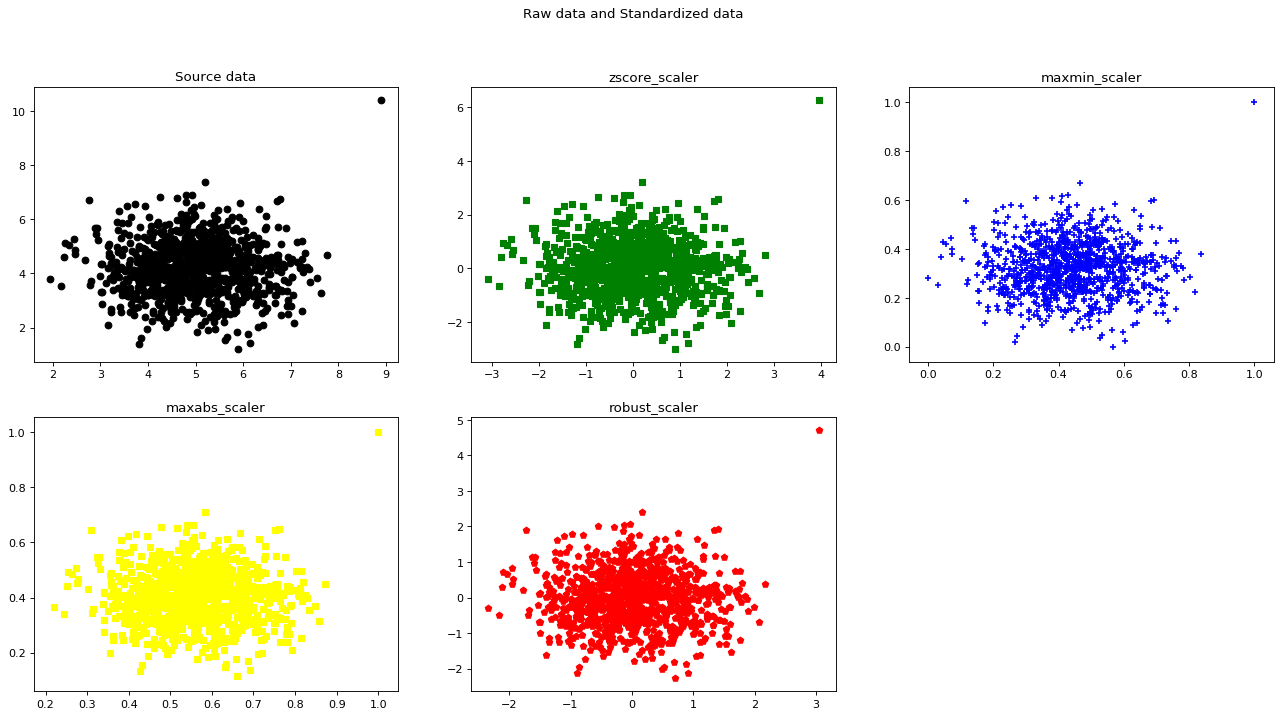

In [64]:
# 展示多网格结果
data_list = [data, data_scaler_zscore, data_scaler_minmax, data_scaler_maxabs, data_scaler_robust]
color_list = ['black', 'green', 'blue', 'yellow', 'red']
marker_list = ['o', ',', '+', 's', 'p']
title_list = ['Source data', 'zscore_scaler', 'maxmin_scaler', 'maxabs_scaler', 'robust_scaler']
plt.figure(figsize=(20,10),dpi=80)
for i, data_single in enumerate(data_list):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data_single[:, :-1], data_single[:, -1], marker = marker_list[i], c = color_list[i])
    plt.title(title_list[i])
plt.suptitle('Raw data and Standardized data')
plt.show()

## 3.10 离散化，对运营数据做逻辑分层

所谓离散化，就是把无限空间中有限的个体映射到有限的空间中。大多数是对连续性数据进行，处理后的数据值域分布将从连续属性变为离散属性。离散化处理的必要性有：

* **节约计算资源，提高计算效率**
* **算法模型（尤其是分类模型）的计算需要**（例如决策树模型本身支持输入连续性数据，但是会将连续性数据转化为离散化数据）
* **增强模型的稳定性和准确度**（离散化后，异常数据会被划分为一个子集中的一部分，对模型的影响大大降低，尤其是基于距离计算的模型，K均值、协同过滤等）
* **特定数据处理和分析的必要步骤，尤其在图像处理方面应用广泛**（二值化也是离散化的一种）
* **模型结果应用和部署的需要**

### 3.10.1 针对时间数据的离散化

主要用于以时间为主要特征的数据集和粒度转换，离散化处理后将分散的时间特征转换为更高层次的时间特征。常见的针对时间数据的离散化操作分为两类：

1. 针对一天中的时间离散化：一般是将时间戳转换为时、分、秒或者上午、下午、晚上等
2. 针对日粒度以上数据的离散化：一般是将日期转换为周数、周几、月、工作日或者休息日、季度、年等

针对时间数据的离散化可以将细粒度的时间序列数据离散化为粗粒度的三类数据：

1. **离散化为分类数据**：例如上午、下午
2. **离散化为顺序数据**：例如周一、周二、周三
3. **离散化为数值型数据**：例如一年有52周，周数就是数值型的数据

### 3.10.2 针对多值离散数据的离散化

多值离散数据的离散化是指要进行离散化处理的数据本身不是数值型数据，而是分类或者顺序数据。

例如用户活跃度变量的值，原来为高、中、低三个类别，但是由于业务的变化，新的用户活跃度变量需要高、中、低、负四个类别，此时就需要对不同类别的数据进行统一规则的离散化处理。

### 3.10.3 针对连续数据的离散化

此类离散化是主要的离散化应用，在分类或者关联分析中应用广泛，此类算法的结果是以类别或者属性标识为基础，而非数值型标记。连续数据的离散化结果可以分为两类：

1. 将连续数据划分为特定区间的集合
2. 将连续数据划分为特定类

常用实现针对连续数据离散化的方法包括：

* **分位数法**：使用四分位、五分位、十分位等分位数进行离散化处理
* **距离区间法**：等距区间或者自定义区间进行离散化
* **频率区间法**：按照不同数据的频率分布进行排序，再按照等频率或者指定频率离散化（会改变原有数据的分布状态）
* **聚类法**：使用K均值将样本集分为多个离散化的簇
* **卡方**：基于卡方的离散化方法，找出数据的最佳临近区间并合并，形成较大的区间。

### 3.10.4 针对连续数据的二值化

二值化是指对每个数据点跟阈值进行比较，大于阈值设置为某一固定值，小于阈值设置为某一固定值，然后得到一个只拥有两个值域的二值化数据集。

二值化应用的前提是数据集中所有的属性值所代表的含义相同或类似。

### 3.10.5 代码实操：Python数据离散化处理

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [66]:
# 读取数据
data_df = pd.read_table('data7.txt', names=['id', 'amount', 'income', 'datetime', 'age'])
data_df.head()

,id,amount,income,datetime,age
0,15093,1390,10.40,2017-04-30 19:24:13,0-10
1,15062,4024,4.68,2017-04-27 22:44:59,70-80
2,15028,6359,3.84,2017-04-27 10:07:55,40-50
3,15012,7759,3.70,2017-04-04 07:28:18,30-40
4,15021,331,4.25,2017-04-08 11:14:00,70-80


In [67]:
# 针对时间数据的离散化

# 循环得到索引和对应值
for i, single_data in enumerate(data_df['datetime']):
    # 将时间转为datetime格式
    single_data_tmp = pd.to_datetime(single_data)
    # 离散化为周几
    data_df['datetime'][i] = single_data_tmp.weekday()
    
print(data_df.head())

/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


      id  amount  income datetime    age
0  15093    1390   10.40        6   0-10
1  15062    4024    4.68        3  70-80
2  15028    6359    3.84        3  40-50
3  15012    7759    3.70        1  30-40
4  15021     331    4.25        5  70-80


In [68]:
# 针对多值离散数据的离散化

# 定义一个要转换的新区间
map_df = pd.DataFrame([['0-10', '0-40'], ['10-20', '0-40'], ['20-30', '0-40'], ['30-40', '0-40'], ['40-50', '40-80'],
                       ['50-60', '40-80'], ['60-70', '40-80'], ['70-80', '40-80'], ['80-90', '>80'], ['>90', '>80']],
                      columns=['age', 'age2'])
# 数据框关联匹配
df_tmp = data_df.merge(map_df, left_on='age', right_on='age', how='inner')
# 去除名为age的列
df = df_tmp.drop('age', 1)

df.head()

,id,amount,income,datetime,age2
0,15093,1390,10.40,6,0-40
1,15064,7952,4.40,0,0-40
2,15080,503,5.72,5,0-40
3,15068,1668,3.19,5,0-40
4,15019,6710,3.20,0,0-40


In [69]:
# 针对连续数据的离散化

# 方法一：自定义分箱区间实现离散化
# 自定义区间边界
bins = [0, 200, 1000, 5000, 10000]
# 使用边界进行离散化
df['amount1'] = pd.cut(df['amount'], bins)

df.head()

,id,amount,income,datetime,age2,amount1
0,15093,1390,10.40,6,0-40,"(1000, 5000]"
1,15064,7952,4.40,0,0-40,"(5000, 10000]"
2,15080,503,5.72,5,0-40,"(200, 1000]"
3,15068,1668,3.19,5,0-40,"(1000, 5000]"
4,15019,6710,3.20,0,0-40,"(5000, 10000]"


In [70]:
# 方法二： 使用聚类实现离散化
data = np.array(df['amount'])
# 转换数据形状
data_reshape = data.reshape((data.shape[0], 1))
# 创建聚类，并制定要聚类的数量
model_kmeans = KMeans(n_clusters=4, random_state=0)
# 聚类建模
kmeans_result = model_kmeans.fit_predict(data_reshape)
# 新离散化的数据合并到原数据中
df['amount2'] = kmeans_result

df.head()

,id,amount,income,datetime,age2,amount1,amount2
0,15093,1390,10.40,6,0-40,"(1000, 5000]",2
1,15064,7952,4.40,0,0-40,"(5000, 10000]",1
2,15080,503,5.72,5,0-40,"(200, 1000]",2
3,15068,1668,3.19,5,0-40,"(1000, 5000]",2
4,15019,6710,3.20,0,0-40,"(5000, 10000]",1


In [71]:
# 方法三：使用4分位进行分割
df['amount3'] = pd.qcut(df['amount'], 4, labels=['bad', 'medium', 'good', 'awesome'])
df = df.drop('amount', 1)

df.head()

,id,income,datetime,age2,amount1,amount2,amount3
0,15093,10.40,6,0-40,"(1000, 5000]",2,bad
1,15064,4.40,0,0-40,"(5000, 10000]",1,awesome
2,15080,5.72,5,0-40,"(200, 1000]",2,bad
3,15068,3.19,5,0-40,"(1000, 5000]",2,bad
4,15019,3.20,0,0-40,"(5000, 10000]",1,awesome


In [72]:
# 针对连续数据的二值化

# 建立Binarizer模型对象
binarizer_scalar = preprocessing.Binarizer(threshold=df['income'].mean())
# Binarizer标准化转换
income_tmp = binarizer_scalar.fit_transform(np.array(df['income']).reshape(-1, 1))
# 转换数据格式
income_tmp.resize(df['income'].shape)
# 合并到原数据
df['income'] = income_tmp

df.head()

,id,income,datetime,age2,amount1,amount2,amount3
0,15093,1.0,6,0-40,"(1000, 5000]",2,bad
1,15064,1.0,0,0-40,"(5000, 10000]",1,awesome
2,15080,1.0,5,0-40,"(200, 1000]",2,bad
3,15068,0.0,5,0-40,"(1000, 5000]",2,bad
4,15019,0.0,0,0-40,"(5000, 10000]",1,awesome


## 3.11 数据处理应该考虑哪些运营业务因素

数据处理工作不仅依赖于数据工作者的经验，也需要考虑实际的运营业务因素。数据处理时应该考虑的运营业务因素包括固定和突发运营周期、运营需求的有效性、交付时要贴合运营落地场景、专家经验、业务需求等变动因素。

### 3.11.1 考虑固定和突发运营周期

运营周期的属性主要表现在两个方面：

1. **有计划的周期性**
2. **临时或突发周期**

运营业务的周期性对数据的影响：

* 有计划的周期在数据的选取和分析过程中非常重要，尤其涉及对比时，选对具有相同属性的对比周期是形成结论的基础
* 有计划的运营周期对于时间序列特征明显的建模影响较大，包括时间序列、时序关联、隐马尔可夫模型等
* 不同周期下产生的数据可能有差异，尤其是对于高速发展的新型公司，不同周期下的数据可能带有明显的线性、指数、二项式以及其他变化特征，甚至可能带有业务因素导致的异常数据点
* 运营过程中可能产生突发的数据工作需求
* 数据工作的整个过程需要运营业务人员参与，而依赖于运营业务人员参与的时机以及对应的方式和切入点也很重要。

### 3.11.2 考虑运营需求的有效性

数据工作者可以对某些需求做拒绝或者延迟处理，主要原因如下：

1. **缺少数据**
2. **需求不合理**
3. **条件限制**
4. **资源限制**
5. **低价值需求**

### 3.11.3 考虑交付时要贴合运营落地场景

数据处理工作虽然只是中间过程，并没有到达数据分析、建模、部署和应用的阶段，但是该阶段的很多工作会直接影响后期的交付和运营落地，典型因素如下：
1. **维持原有指标**
2. **更容易理解的算法限制**
3. **数据生产和应用环境**

### 3.11.4 不要忽视业务专家的经验

业务专家经验在数据处理工作中的重要作用体现在一下两个方面：

1. **数据工作方向**：专家经验会决定需要做什么、产出是什么、中间的过程应该向哪个方向考虑，侧重于“是什么”。直接影响着：
    * 数据项目工作目标和需求
    * 数据探索和摸底方向
    * 数据交付物的形式和规格
2. **数据工作逻辑**：专家经验可以提出有价值的参考和工作建议，侧重于“怎么做”，直接影响着：
    * 总体数据周期、规则、条件等的选取
    * 数据抽样规则，有其涉及到分层、整群抽样
    * 多数据的整合、匹配和关联关系
    * 不同数据源和数据间的清洗、转换逻辑
    * 重复值、异常值和缺失值的处理逻辑
    * 数据离散化的方法选择和区间定义
    * 根据变量重要性进行数据变量的选取和降维
    * 数据算法和模型选择
    * 数据模型的调整、评估和优化
    
### 3.11.5 考虑业务需求的变动因素

为了最小程度的降低业务的变动给数据工作带来困惑，甚至失败，应该提前做好如下几个准备：

1. **充分、有效的沟通**
2. **更完整、更原始的数据集**
3. **可理解性强、规则清晰的算法和模型**
4. **模块化工作方法**
5. **建立数据工作流程和机制**